In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

        Date  FEDFUNDS  CP3Mx  TB3MS  TB6MS   GS1   GS5  GS10   AAA   BAA  \
0 1959-01-01      2.48   3.30   2.82   3.09  3.36  4.01  4.02  4.12  4.87   
1 1959-02-01      2.43   3.26   2.70   3.13  3.54  3.96  3.96  4.14  4.89   
2 1959-03-01      2.80   3.35   2.80   3.13  3.61  3.99  3.99  4.13  4.85   
3 1959-04-01      2.96   3.42   2.95   3.27  3.72  4.12  4.12  4.23  4.86   
4 1959-05-01      2.90   3.56   2.84   3.33  3.96  4.35  4.31  4.37  4.96   

   COMPAPFFx  TB3SMFFM  TB6SMFFM  T1YFFM  T5YFFM  T10YFFM  AAAFFM  BAAFFM  
0       0.82      0.34      0.61    0.88    1.53     1.54    1.64    2.39  
1       0.83      0.27      0.70    1.11    1.53     1.53    1.71    2.46  
2       0.55      0.00      0.33    0.81    1.19     1.19    1.33    2.05  
3       0.46     -0.01      0.31    0.76    1.16     1.16    1.27    1.90  
4       0.66     -0.06      0.43    1.06    1.45     1.41    1.47    2.06  


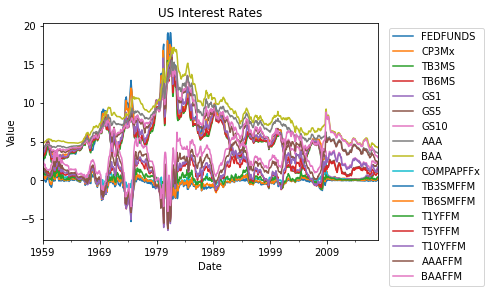

In [67]:
df = pd.read_excel('USInterestRate.xlsx', parse_dates=[0]) 
print(df.head())
#df = pd.read_excel('USInterestRate.xlsx', parse_dates=['Date'])

# Set the index of the DataFrame to the date column
df.set_index('Date', inplace=True)

# Plot the DataFrame using Matplotlib
df.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('US Interest Rates')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [61]:
import matplotlib.pyplot as plt

In [69]:
X = df.iloc[:, 1:].values
Date = df.iloc[:,0].index
print(Date)

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=708, freq=None)


In [70]:
print(X.shape)

(708, 16)


In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
PC = pca.fit_transform(X)

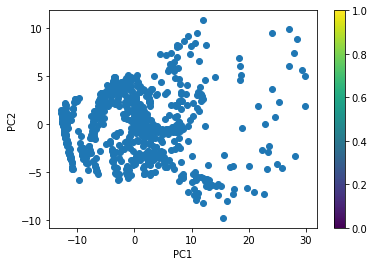

In [72]:
plt.scatter(PC[:,0], PC[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


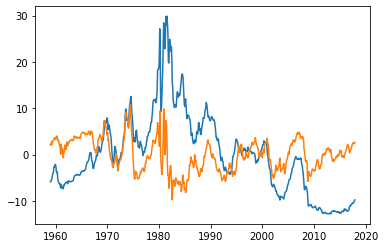

In [74]:

# Assuming you already have an array named X
plt.plot(Date, PC)
plt.show()


In [150]:
Xhat = pca.inverse_transform(PC)
Xhat = Xhat


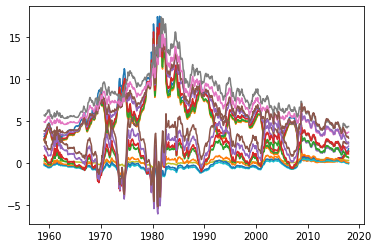

In [151]:
plt.plot(Date, Xhat)

In [152]:
variance_ratio = pca.explained_variance_ratio_

# Calculate the total percentage of the variance captured by the first two principal components
total_variance = np.sum(variance_ratio[:2])
percent_total_variance = total_variance * 100

print(f'The first two principal components explain {percent_total_variance:.2f}% of the total variance.')






The first two principal components explain 97.40% of the total variance.


In [153]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data into a NumPy array
# Define the dimensions of the input and latent spaces
input_dim = X.shape[1]
latent_dim = 1

# Define the encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(16, activation='sigmoid')(inputs)
encoded = Dense(2, activation='relu')(encoded)

# Define the decoder
decoded = Dense(16, activation='sigmoid')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Define the autoencoder
autoencoder = Model(inputs, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=1000)

# Extract the encoder model for dimensionality reduction
encoder = Model(inputs, encoded)
encoded_X = encoder.predict(X)




Epoch 1/1000
23/23 [==============================] - 0s 946us/step - loss: 24.6770
Epoch 2/1000
23/23 [==============================] - 0s 353us/step - loss: 23.2590
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 21.7210
Epoch 4/1000
23/23 [==============================] - 0s 791us/step - loss: 19.8422
Epoch 5/1000
23/23 [==============================] - 0s 752us/step - loss: 17.8602
Epoch 6/1000
23/23 [==============================] - 0s 908us/step - loss: 16.0868
Epoch 7/1000
23/23 [==============================] - 0s 725us/step - loss: 14.4826
Epoch 8/1000
23/23 [==============================] - 0s 449us/step - loss: 13.0962
Epoch 9/1000
23/23 [==============================] - 0s 772us/step - loss: 11.8882
Epoch 10/1000
23/23 [==============================] - 0s 742us/step - loss: 10.8352
Epoch 11/1000
23/23 [==============================] - 0s 758us/step - loss: 9.9390
Epoch 12/1000
23/23 [==============================] - 0s 799us/step - loss: 

23/23 [==============================] - 0s 756us/step - loss: 0.7883
Epoch 99/1000
23/23 [==============================] - 0s 753us/step - loss: 0.7735
Epoch 100/1000
23/23 [==============================] - 0s 637us/step - loss: 0.7556
Epoch 101/1000
23/23 [==============================] - 0s 328us/step - loss: 0.7423
Epoch 102/1000
23/23 [==============================] - 0s 760us/step - loss: 0.7246
Epoch 103/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.7102
Epoch 104/1000
23/23 [==============================] - 0s 680us/step - loss: 0.6985
Epoch 105/1000
23/23 [==============================] - 0s 251us/step - loss: 0.6822
Epoch 106/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6723
Epoch 107/1000
23/23 [==============================] - 0s 343us/step - loss: 0.6569
Epoch 108/1000
23/23 [==============================] - 0s 757us/step - loss: 0.6446
Epoch 109/1000
23/23 [==============================] - 0s 743us/step - loss: 0.6397


23/23 [==============================] - 0s 1ms/step - loss: 0.2121
Epoch 195/1000
23/23 [==============================] - 0s 680us/step - loss: 0.2089
Epoch 196/1000
23/23 [==============================] - 0s 158us/step - loss: 0.2072
Epoch 197/1000
23/23 [==============================] - 0s 102us/step - loss: 0.2001
Epoch 198/1000
23/23 [==============================] - 0s 711us/step - loss: 0.2004
Epoch 199/1000
23/23 [==============================] - 0s 702us/step - loss: 0.1964
Epoch 200/1000
23/23 [==============================] - 0s 701us/step - loss: 0.1955
Epoch 201/1000
23/23 [==============================] - 0s 748us/step - loss: 0.2013
Epoch 202/1000
23/23 [==============================] - 0s 759us/step - loss: 0.1934
Epoch 203/1000
23/23 [==============================] - 0s 789us/step - loss: 0.2022
Epoch 204/1000
23/23 [==============================] - 0s 725us/step - loss: 0.2009
Epoch 205/1000
23/23 [==============================] - 0s 579us/step - loss: 0.19

23/23 [==============================] - 0s 761us/step - loss: 0.1289
Epoch 291/1000
23/23 [==============================] - 0s 749us/step - loss: 0.1285
Epoch 292/1000
23/23 [==============================] - 0s 671us/step - loss: 0.1274
Epoch 293/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1261
Epoch 294/1000
23/23 [==============================] - 0s 725us/step - loss: 0.1332
Epoch 295/1000
23/23 [==============================] - 0s 216us/step - loss: 0.1299
Epoch 296/1000
23/23 [==============================] - 0s 758us/step - loss: 0.1260
Epoch 297/1000
23/23 [==============================] - 0s 763us/step - loss: 0.1270
Epoch 298/1000
23/23 [==============================] - 0s 118us/step - loss: 0.1247
Epoch 299/1000
23/23 [==============================] - 0s 711us/step - loss: 0.1250
Epoch 300/1000
23/23 [==============================] - 0s 687us/step - loss: 0.1270
Epoch 301/1000
23/23 [==============================] - 0s 761us/step - loss: 0.12

23/23 [==============================] - 0s 750us/step - loss: 0.1092
Epoch 387/1000
23/23 [==============================] - 0s 750us/step - loss: 0.1108
Epoch 388/1000
23/23 [==============================] - 0s 669us/step - loss: 0.1105
Epoch 389/1000
23/23 [==============================] - 0s 761us/step - loss: 0.1101
Epoch 390/1000
23/23 [==============================] - 0s 756us/step - loss: 0.1101
Epoch 391/1000
23/23 [==============================] - 0s 757us/step - loss: 0.1094
Epoch 392/1000
23/23 [==============================] - 0s 851us/step - loss: 0.1097
Epoch 393/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 394/1000
23/23 [==============================] - 0s 680us/step - loss: 0.1089
Epoch 395/1000
23/23 [==============================] - 0s 134us/step - loss: 0.1103
Epoch 396/1000
23/23 [==============================] - 0s 73us/step - loss: 0.1082
Epoch 397/1000
23/23 [==============================] - 0s 757us/step - loss: 0.109

23/23 [==============================] - 0s 751us/step - loss: 0.1047
Epoch 483/1000
23/23 [==============================] - 0s 680us/step - loss: 0.1025
Epoch 484/1000
23/23 [==============================] - 0s 725us/step - loss: 0.1007
Epoch 485/1000
23/23 [==============================] - 0s 730us/step - loss: 0.1003
Epoch 486/1000
23/23 [==============================] - 0s 759us/step - loss: 0.1008
Epoch 487/1000
23/23 [==============================] - 0s 756us/step - loss: 0.1013
Epoch 488/1000
23/23 [==============================] - 0s 753us/step - loss: 0.1017
Epoch 489/1000
23/23 [==============================] - 0s 757us/step - loss: 0.1019
Epoch 490/1000
23/23 [==============================] - 0s 759us/step - loss: 0.1020
Epoch 491/1000
23/23 [==============================] - 0s 799us/step - loss: 0.1025
Epoch 492/1000
23/23 [==============================] - 0s 963us/step - loss: 0.0997
Epoch 493/1000
23/23 [==============================] - 0s 725us/step - loss: 0.

23/23 [==============================] - 0s 763us/step - loss: 0.0943
Epoch 579/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0944
Epoch 580/1000
23/23 [==============================] - 0s 329us/step - loss: 0.0949
Epoch 581/1000
23/23 [==============================] - 0s 711us/step - loss: 0.0972
Epoch 582/1000
23/23 [==============================] - 0s 725us/step - loss: 0.0958
Epoch 583/1000
23/23 [==============================] - 0s 731us/step - loss: 0.0963
Epoch 584/1000
23/23 [==============================] - 0s 750us/step - loss: 0.0966
Epoch 585/1000
23/23 [==============================] - 0s 760us/step - loss: 0.0949
Epoch 586/1000
23/23 [==============================] - 0s 757us/step - loss: 0.0942
Epoch 587/1000
23/23 [==============================] - 0s 758us/step - loss: 0.0954
Epoch 588/1000
23/23 [==============================] - 0s 763us/step - loss: 0.0945
Epoch 589/1000
23/23 [==============================] - 0s 755us/step - loss: 0.09

23/23 [==============================] - 0s 757us/step - loss: 0.0926
Epoch 675/1000
23/23 [==============================] - 0s 758us/step - loss: 0.0917
Epoch 676/1000
23/23 [==============================] - 0s 210us/step - loss: 0.0923
Epoch 677/1000
23/23 [==============================] - 0s 144us/step - loss: 0.0910
Epoch 678/1000
23/23 [==============================] - 0s 711us/step - loss: 0.0918
Epoch 679/1000
23/23 [==============================] - 0s 755us/step - loss: 0.0915
Epoch 680/1000
23/23 [==============================] - 0s 798us/step - loss: 0.0916
Epoch 681/1000
23/23 [==============================] - 0s 725us/step - loss: 0.0913
Epoch 682/1000
23/23 [==============================] - 0s 573us/step - loss: 0.0910
Epoch 683/1000
23/23 [==============================] - 0s 748us/step - loss: 0.0916
Epoch 684/1000
23/23 [==============================] - 0s 757us/step - loss: 0.0919
Epoch 685/1000
23/23 [==============================] - 0s 771us/step - loss: 0.

23/23 [==============================] - 0s 498us/step - loss: 0.0901
Epoch 771/1000
23/23 [==============================] - 0s 756us/step - loss: 0.0901
Epoch 772/1000
23/23 [==============================] - 0s 667us/step - loss: 0.0896
Epoch 773/1000
23/23 [==============================] - 0s 785us/step - loss: 0.0901
Epoch 774/1000
23/23 [==============================] - 0s 803us/step - loss: 0.0892
Epoch 775/1000
23/23 [==============================] - 0s 684us/step - loss: 0.0888
Epoch 776/1000
23/23 [==============================] - 0s 128us/step - loss: 0.0891
Epoch 777/1000
23/23 [==============================] - 0s 757us/step - loss: 0.0903
Epoch 778/1000
23/23 [==============================] - 0s 723us/step - loss: 0.0899
Epoch 779/1000
23/23 [==============================] - 0s 725us/step - loss: 0.0896
Epoch 780/1000
23/23 [==============================] - 0s 650us/step - loss: 0.0890
Epoch 781/1000
23/23 [==============================] - 0s 750us/step - loss: 0.

23/23 [==============================] - 0s 759us/step - loss: 0.0874
Epoch 867/1000
23/23 [==============================] - 0s 860us/step - loss: 0.0889
Epoch 868/1000
23/23 [==============================] - 0s 725us/step - loss: 0.0873
Epoch 869/1000
23/23 [==============================] - 0s 463us/step - loss: 0.0875
Epoch 870/1000
23/23 [==============================] - 0s 757us/step - loss: 0.0875
Epoch 871/1000
23/23 [==============================] - 0s 760us/step - loss: 0.0878
Epoch 872/1000
23/23 [==============================] - 0s 749us/step - loss: 0.0877
Epoch 873/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0873
Epoch 874/1000
23/23 [==============================] - 0s 503us/step - loss: 0.0872
Epoch 875/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 876/1000
23/23 [==============================] - 0s 710us/step - loss: 0.0870
Epoch 877/1000
23/23 [==============================] - 0s 720us/step - loss: 0.0872

23/23 [==============================] - 0s 678us/step - loss: 0.0879
Epoch 963/1000
23/23 [==============================] - 0s 725us/step - loss: 0.0866
Epoch 964/1000
23/23 [==============================] - 0s 666us/step - loss: 0.0882
Epoch 965/1000
23/23 [==============================] - 0s 760us/step - loss: 0.0916
Epoch 966/1000
23/23 [==============================] - 0s 867us/step - loss: 0.0980
Epoch 967/1000
23/23 [==============================] - 0s 801us/step - loss: 0.0893
Epoch 968/1000
23/23 [==============================] - 0s 725us/step - loss: 0.0868
Epoch 969/1000
23/23 [==============================] - 0s 455us/step - loss: 0.0862
Epoch 970/1000
23/23 [==============================] - 0s 760us/step - loss: 0.0862
Epoch 971/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0862
Epoch 972/1000
23/23 [==============================] - 0s 427us/step - loss: 0.0867
Epoch 973/1000
23/23 [==============================] - 0s 762us/step - loss: 0.08

In [154]:
Xhat = autoencoder.predict(X)

23/23 [==============================] - 0s 635us/step


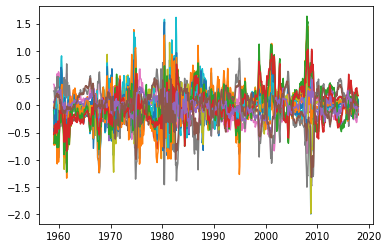

In [155]:
plt.plot(Date, Xhat-X)

In [143]:
junk = np.var(Xhat,axis=0)

junk1 = np.var(X, axis= 0)

ERROR = Xhat -X
SEE = np.sum(ERROR**2, axis=0)
print(SEE)

# Format the dates as 'YYYY-MM-DD'


[ 46.95988125  35.80101138  32.63119506  52.34213672  49.59940608
  41.83640513  50.65767141 118.06852462  73.41037853  78.62895125
  87.43667061 118.30791009  93.84380889  63.98040751  14.87507941
  57.34769469]
